In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc_SVT import  HNC_solver
from qsps import *


In [2]:
N_bins = 1000

In [3]:
def run_hnc(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, c_s_r_guess=None , method='best', alpha=0.01):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 2
    Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                        [qsp.Γei,  qsp.Γee]])


    names = ["Ion-1", "Electron", ] 
    kappa = 1
    rhos = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
    temps = np.array([qsp.Ti, qsp.Te_c])
    masses= np.array([qsp.m_i, m_e])

    hnc1 = HNC_solver(N_species, Gamma, rhos, temps, masses , tol=1e-5,
                     kappa_multiscale=1, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=N_bins, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array), qsp.βvei(hnc1.r_array)],
                            [qsp.βvei(hnc1.r_array), qsp.βvee(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    if c_s_r_guess is not None:
        for i in range(N_species):
            for j in range(N_species):
                if (c_s_r_guess[i,j]!=np.zeros(hnc1.N_bins)).all():
                    hnc1.c_k_matrix[i,j] = c_k_guess[i,j]
                    hnc1.c_r_matrix[i,j] = hnc1.FT_k_2_r(hnc1.c_k_matrix[i,j])
                    hnc1.c_s_k_matrix[i,j] = hnc1.c_k_matrix[i,j] + hnc1.βu_l_k_matrix[i,j]
                    hnc1.c_s_r_matrix[i,j] = hnc1.c_r_matrix[i,j] + hnc1.βu_l_r_matrix[i,j]

    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = alpha, alpha_oz = 0e-4, h_max=1e4)

    return hnc1, qsp

In [4]:
def run_hnc_one_species(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, method='best' , alpha=0.01):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 1
    Gamma = np.array(  [[qsp.Γii]])


    names = ["Ion-1"] 
    kappa = 1
    temps = np.array([qsp.Ti])
    masses= np.array([qsp.m_i])
    rho = np.array([  3/(4*np.pi)])
    hnc1 = HNC_solver(N_species, Gamma, rho,  temps, masses, kappa=kappa, tol=1e-5,
                     kappa_multiscale=1, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=1000, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = alpha, alpha_oz = 0e-4, h_max=1e4)
    return hnc1, qsp

# Priority 1
## Carbon

In [8]:
ni = 5.01e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 6,12
Zstar= 3

# c_s_r_guess = np.zeros((2,2,N_bins))
# c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix

carbon, carbonqsp = run_hnc(ni, Te, Z, A, Zstar ,method='fixed', alpha=1e-2, num_iterations=1e3)


Λei = 0.232
Λee = 0.328
Λei = 0.232
Γii=82.957, Γie=-1.499, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =4.18e-02
0: Err in c_r: 2.86e+00, OZ: 2.83e-01, HNC: 3.71e-01
1: Err in c_r: 2.84e+00, OZ: 2.83e-01, HNC: 3.63e-01
2: Err in c_r: 2.81e+00, OZ: 2.82e-01, HNC: 3.57e-01
3: Err in c_r: 2.79e+00, OZ: 2.82e-01, HNC: 3.50e-01
4: Err in c_r: 2.76e+00, OZ: 2.82e-01, HNC: 3.44e-01
5: Err in c_r: 2.74e+00, OZ: 2.81e-01, HNC: 3.38e-01
6: Err in c_r: 2.71e+00, OZ: 2.81e-01, HNC: 3.32e-01
7: Err in c_r: 2.69e+00, OZ: 2.80e-01, HNC: 3.26e-01
8: Err in c_r: 2.67e+00, OZ: 2.80e-01, HNC: 3.21e-01
9: Err in c_r: 2.64e+00, OZ: 2.80e-01, HNC: 3.15e-01
10: Err in c_r: 2.62e+00, OZ: 2.79e-01, HNC: 3.10e-01
11: Err in c_r: 2.59e+00, OZ: 2.79e-01, HNC: 3.05e-01
12: Err in c_r: 2.57e+00, OZ: 2.79e-01, HNC: 3.00e-01
13: Err in c_r: 2.55e+00, OZ: 2.78e-01, HNC: 2.96e-01
14: Err in c_r: 2.53e+00, OZ: 2.78e-01, HNC: 2.91e-01
15: Err in c_r: 2.50e+00, OZ: 2.78e-01, HNC: 2.87e-01
16: Err in c_r: 2.48e+00, OZ: 2.77e-01, HN

152: Err in c_r: 7.28e-01, OZ: 2.44e-01, HNC: 1.52e-01
153: Err in c_r: 7.22e-01, OZ: 2.44e-01, HNC: 1.52e-01
154: Err in c_r: 7.15e-01, OZ: 2.44e-01, HNC: 1.53e-01
155: Err in c_r: 7.09e-01, OZ: 2.44e-01, HNC: 1.53e-01
156: Err in c_r: 7.03e-01, OZ: 2.44e-01, HNC: 1.53e-01
157: Err in c_r: 6.96e-01, OZ: 2.44e-01, HNC: 1.54e-01
158: Err in c_r: 6.90e-01, OZ: 2.43e-01, HNC: 1.54e-01
159: Err in c_r: 6.84e-01, OZ: 2.43e-01, HNC: 1.54e-01
160: Err in c_r: 6.78e-01, OZ: 2.43e-01, HNC: 1.55e-01
161: Err in c_r: 6.72e-01, OZ: 2.43e-01, HNC: 1.55e-01
162: Err in c_r: 6.66e-01, OZ: 2.43e-01, HNC: 1.56e-01
163: Err in c_r: 6.60e-01, OZ: 2.43e-01, HNC: 1.56e-01
164: Err in c_r: 6.54e-01, OZ: 2.43e-01, HNC: 1.56e-01
165: Err in c_r: 6.48e-01, OZ: 2.42e-01, HNC: 1.57e-01
166: Err in c_r: 6.43e-01, OZ: 2.42e-01, HNC: 1.57e-01
167: Err in c_r: 6.37e-01, OZ: 2.42e-01, HNC: 1.58e-01
168: Err in c_r: 6.31e-01, OZ: 2.42e-01, HNC: 1.58e-01
169: Err in c_r: 6.26e-01, OZ: 2.42e-01, HNC: 1.59e-01
170: Err i

301: Err in c_r: 2.01e-01, OZ: 2.30e-01, HNC: 2.77e-01
302: Err in c_r: 2.00e-01, OZ: 2.30e-01, HNC: 2.78e-01
303: Err in c_r: 1.98e-01, OZ: 2.30e-01, HNC: 2.79e-01
304: Err in c_r: 1.97e-01, OZ: 2.30e-01, HNC: 2.80e-01
305: Err in c_r: 1.95e-01, OZ: 2.29e-01, HNC: 2.81e-01
306: Err in c_r: 1.93e-01, OZ: 2.29e-01, HNC: 2.83e-01
307: Err in c_r: 1.92e-01, OZ: 2.29e-01, HNC: 2.84e-01
308: Err in c_r: 1.90e-01, OZ: 2.29e-01, HNC: 2.85e-01
309: Err in c_r: 1.89e-01, OZ: 2.29e-01, HNC: 2.86e-01
310: Err in c_r: 1.87e-01, OZ: 2.29e-01, HNC: 2.87e-01
311: Err in c_r: 1.86e-01, OZ: 2.29e-01, HNC: 2.89e-01
312: Err in c_r: 1.84e-01, OZ: 2.29e-01, HNC: 2.90e-01
313: Err in c_r: 1.83e-01, OZ: 2.29e-01, HNC: 2.91e-01
314: Err in c_r: 1.81e-01, OZ: 2.29e-01, HNC: 2.92e-01
315: Err in c_r: 1.80e-01, OZ: 2.29e-01, HNC: 2.93e-01
316: Err in c_r: 1.78e-01, OZ: 2.29e-01, HNC: 2.95e-01
317: Err in c_r: 1.77e-01, OZ: 2.29e-01, HNC: 2.96e-01
318: Err in c_r: 1.76e-01, OZ: 2.29e-01, HNC: 2.97e-01
319: Err i

450: Err in c_r: 6.89e-02, OZ: 2.21e-01, HNC: 4.68e-01
451: Err in c_r: 6.85e-02, OZ: 2.20e-01, HNC: 4.69e-01
452: Err in c_r: 6.81e-02, OZ: 2.20e-01, HNC: 4.71e-01
453: Err in c_r: 6.77e-02, OZ: 2.20e-01, HNC: 4.72e-01
454: Err in c_r: 6.73e-02, OZ: 2.20e-01, HNC: 4.73e-01
455: Err in c_r: 6.69e-02, OZ: 2.20e-01, HNC: 4.75e-01
456: Err in c_r: 6.65e-02, OZ: 2.20e-01, HNC: 4.76e-01
457: Err in c_r: 6.61e-02, OZ: 2.20e-01, HNC: 4.77e-01
458: Err in c_r: 6.57e-02, OZ: 2.20e-01, HNC: 4.79e-01
459: Err in c_r: 6.53e-02, OZ: 2.20e-01, HNC: 4.80e-01
460: Err in c_r: 6.49e-02, OZ: 2.20e-01, HNC: 4.81e-01
461: Err in c_r: 6.46e-02, OZ: 2.20e-01, HNC: 4.83e-01
462: Err in c_r: 6.42e-02, OZ: 2.20e-01, HNC: 4.84e-01
463: Err in c_r: 6.38e-02, OZ: 2.20e-01, HNC: 4.85e-01
464: Err in c_r: 6.34e-02, OZ: 2.20e-01, HNC: 4.87e-01
465: Err in c_r: 6.31e-02, OZ: 2.20e-01, HNC: 4.88e-01
466: Err in c_r: 6.27e-02, OZ: 2.20e-01, HNC: 4.89e-01
467: Err in c_r: 6.24e-02, OZ: 2.19e-01, HNC: 4.91e-01
468: Err i

599: Err in c_r: 3.37e-02, OZ: 2.10e-01, HNC: 6.58e-01
600: Err in c_r: 3.36e-02, OZ: 2.10e-01, HNC: 6.60e-01
601: Err in c_r: 3.35e-02, OZ: 2.10e-01, HNC: 6.61e-01
602: Err in c_r: 3.34e-02, OZ: 2.10e-01, HNC: 6.62e-01
603: Err in c_r: 3.33e-02, OZ: 2.10e-01, HNC: 6.63e-01
604: Err in c_r: 3.31e-02, OZ: 2.10e-01, HNC: 6.64e-01
605: Err in c_r: 3.30e-02, OZ: 2.10e-01, HNC: 6.66e-01
606: Err in c_r: 3.29e-02, OZ: 2.10e-01, HNC: 6.67e-01
607: Err in c_r: 3.28e-02, OZ: 2.10e-01, HNC: 6.68e-01
608: Err in c_r: 3.27e-02, OZ: 2.10e-01, HNC: 6.69e-01
609: Err in c_r: 3.25e-02, OZ: 2.10e-01, HNC: 6.71e-01
610: Err in c_r: 3.24e-02, OZ: 2.10e-01, HNC: 6.72e-01
611: Err in c_r: 3.23e-02, OZ: 2.09e-01, HNC: 6.73e-01
612: Err in c_r: 3.22e-02, OZ: 2.09e-01, HNC: 6.74e-01
613: Err in c_r: 3.21e-02, OZ: 2.09e-01, HNC: 6.75e-01
614: Err in c_r: 3.20e-02, OZ: 2.09e-01, HNC: 6.77e-01
615: Err in c_r: 3.19e-02, OZ: 2.09e-01, HNC: 6.78e-01
616: Err in c_r: 3.18e-02, OZ: 2.09e-01, HNC: 6.79e-01
617: Err i

KeyboardInterrupt: 

In [ ]:
carbon.plot_species_convergence_g(n_slices= int(len(carbon.h_list)/1)  )
carbon.plot_species_convergence_c(n_slices= int(len(carbon.h_list)/1)  )
carbon.plot_species_convergence_ck(n_slices= int(len(carbon.h_list)/1)  )

In [21]:
carbon_one_species, _ = run_hnc_one_species(ni, Te, Z, A, Zstar , method='fixed', alpha=1)

Λei = 0.232
Λee = 0.328
Λei = 0.643
Γii=82.957, Γie=-1.499, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =4.18e-02
0: Err in c_r: 5.73e+02, OZ: 4.21e-15, HNC: 4.28e-15
1: Err in c_r: 6.02e+01, OZ: 4.24e-15, HNC: 4.15e-15
2: Err in c_r: 2.20e+01, OZ: 4.12e-15, HNC: 6.33e-15
3: Err in c_r: 1.24e+01, OZ: 1.10e-14, HNC: 9.53e-15
4: Err in c_r: 8.37e+00, OZ: 3.72e-15, HNC: 7.56e-15
5: Err in c_r: 6.36e+00, OZ: 8.25e-15, HNC: 7.99e-15
6: Err in c_r: 4.99e+00, OZ: 1.06e-15, HNC: 5.08e-15
7: Err in c_r: 4.10e+00, OZ: 1.85e-15, HNC: 4.72e-15
8: Err in c_r: 3.39e+00, OZ: 3.78e-15, HNC: 4.82e-15
9: Err in c_r: 2.89e+00, OZ: 3.73e-15, HNC: 5.12e-15
10: Err in c_r: 2.48e+00, OZ: 7.31e-15, HNC: 4.83e-15
11: Err in c_r: 2.16e+00, OZ: 7.53e-15, HNC: 4.75e-15
12: Err in c_r: 1.89e+00, OZ: 7.27e-15, HNC: 4.72e-15
13: Err in c_r: 1.68e+00, OZ: 4.06e-15, HNC: 4.22e-15
14: Err in c_r: 1.50e+00, OZ: 7.22e-15, HNC: 4.25e-15
15: Err in c_r: 1.34e+00, OZ: 2.09e-15, HNC: 4.07e-15
16: Err in c_r: 1.21e+00, OZ: 4.45e-15, HN

150: Err in c_r: 3.21e-04, OZ: 7.47e-15, HNC: 2.67e-15
151: Err in c_r: 3.03e-04, OZ: 3.73e-15, HNC: 2.55e-15
152: Err in c_r: 2.86e-04, OZ: 3.71e-15, HNC: 2.61e-15
153: Err in c_r: 2.71e-04, OZ: 4.13e-15, HNC: 2.64e-15
154: Err in c_r: 2.56e-04, OZ: 2.04e-15, HNC: 2.50e-15
155: Err in c_r: 2.42e-04, OZ: 2.04e-15, HNC: 2.56e-15
156: Err in c_r: 2.29e-04, OZ: 9.64e-16, HNC: 2.45e-15
157: Err in c_r: 2.16e-04, OZ: 5.17e-15, HNC: 2.47e-15
158: Err in c_r: 2.04e-04, OZ: 1.81e-15, HNC: 2.53e-15
159: Err in c_r: 1.93e-04, OZ: 3.72e-15, HNC: 2.59e-15
160: Err in c_r: 1.82e-04, OZ: 2.02e-15, HNC: 2.37e-15
161: Err in c_r: 1.72e-04, OZ: 3.60e-15, HNC: 2.64e-15
162: Err in c_r: 1.63e-04, OZ: 2.04e-15, HNC: 2.62e-15
163: Err in c_r: 1.54e-04, OZ: 3.61e-15, HNC: 2.49e-15
164: Err in c_r: 1.46e-04, OZ: 2.89e-16, HNC: 2.55e-15
165: Err in c_r: 1.38e-04, OZ: 2.57e-15, HNC: 2.53e-15
166: Err in c_r: 1.30e-04, OZ: 4.41e-15, HNC: 2.51e-15
167: Err in c_r: 1.23e-04, OZ: 4.14e-15, HNC: 2.49e-15
168: Err i

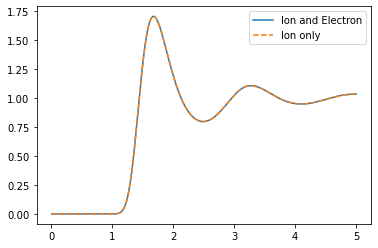

In [24]:
fig, ax = plt.subplots()

ax.plot(carbon.r_array, carbon.h_r_matrix[0,0]+1, label='Ion and Electron')
ax.plot(carbon.r_array, carbon_one_species.h_r_matrix[0,0]+1,'--', label="Ion only")
ax.legend()



In [ ]:
Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,0]+1))  - Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,1]+1))

In [ ]:
-1895796.408371091

## Copper

In [41]:
ni = 8.49e22 # per cc
Te = 1*eV 
Ti   = 1*eV 
Z, A = 29,63.55
Zstar= 1.206
c_s_r_guess = np.zeros((2,2,N_bins))
c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix


copper,_ = run_hnc(ni, Te, Z, A, Zstar ,num_iterations=10, method='fixed', c_s_r_guess=c_s_r_guess)

Λee = 1.103
Λei = 0.780
Γii=14.837, Γie=-12.303, Γee=10.201 
r_i=2.667
r_e=2.506
θ  =1.25e-01
0: Err in c_r: 2.26e+00, OZ: 3.53e+03, HNC: inf
1: Err in c_r: 5.87e-02, OZ: 1.19e+02, HNC: inf
2: Err in c_r: 1.08e-01, OZ: 1.74e+02, HNC: inf
3: Err in c_r: 2.08e+00, OZ: 2.49e+03, HNC: inf
4: Err in c_r: 2.99e+00, OZ: 2.24e+04, HNC: inf
5: Err in c_r: 1.12e+00, OZ: 7.79e+02, HNC: inf
6: Err in c_r: 8.21e-01, OZ: 3.70e+02, HNC: inf
7: Err in c_r: 9.67e-01, OZ: 7.45e+02, HNC: inf
8: Err in c_r: 3.00e+00, OZ: 2.02e+04, HNC: inf
9: Err in c_r: 1.89e+00, OZ: 4.51e+03, HNC: inf


In [22]:
copper.plot_species_convergence_g(n_slices= int(len(copper.h_list)/1)  )
copper.plot_species_convergence_c(n_slices= int(len(copper.h_list)/1)  )

NameError: name 'copper' is not defined

In [39]:
copper_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 1.103
Λei = 0.780
Γii=14.837, Γie=-12.303, Γee=10.201 
r_i=2.667
r_e=2.506
θ  =1.25e-01
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00313886] True Optimization terminated successfully.
0: Err in c_r: 5.56e+01, OZ: 1.54e-01, HNC: 1.60e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 2.90e+01, OZ: 1.45e-01, HNC: 1.15e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 1.52e+01, OZ: 1.34e-01, HNC: 9.94e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 8.05e+00, OZ: 1.25e-01, HNC: 9.62e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 4.34e+00, OZ: 1.17e-01, HNC: 9.65e-03
 HNC min: [0.5] True Optimization terminated suc

 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 2.06e-03, OZ: 9.59e-04, HNC: 9.72e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 1.85e-03, OZ: 8.61e-04, HNC: 8.72e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 1.66e-03, OZ: 7.72e-04, HNC: 7.82e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 1.49e-03, OZ: 6.93e-04, HNC: 7.02e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 1.34e-03, OZ: 6.22e-04, HNC: 6.29e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 1.20e-03, OZ: 5.58e-04, HNC: 5.65e-05
 HNC min: [0.5] True Optimization

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
101: Err in c_r: 1.00e-05, OZ: 4.69e-06, HNC: 4.75e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
102: Err in c_r: 9.00e-06, OZ: 4.21e-06, HNC: 4.26e-07


In [ ]:
fig, ax = plt.subplots()

ax.plot(copper.r_array, copper.h_r_matrix[0,0]+1, label='Ion and electron')
ax.plot(copper.r_array, copper_one_species.h_r_matrix[0,0]+1, label="Only Ions")
ax.legend()



## Hydrogen

In [18]:
ni = 5.98e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 1,1
Zstar= 1
hydrogen, _ = run_hnc(ni, Te, Z, A, Zstar )

Λee = 1.496
Λei = 1.058
Γii=9.778, Γie=-9.783, Γee=9.778 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 1.85e+01, OZ: 6.94e-02, HNC: 1.49e-01
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 9.61e+00, OZ: 6.11e-02, HNC: 7.87e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 5.00e+00, OZ: 5.44e-02, HNC: 6.94e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 2.62e+00, OZ: 4.87e-02, HNC: 7.50e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 1.39e+00, OZ: 4.37e-02, HNC: 8.40e-02
 HNC min: [0.5] True Optimization terminated successfully.


 OZ min:  [0.] True Optimization terminated successfully.
50: Err in c_r: 1.01e-04, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
51: Err in c_r: 8.60e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 7.32e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 6.23e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 5.30e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 4.51e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization

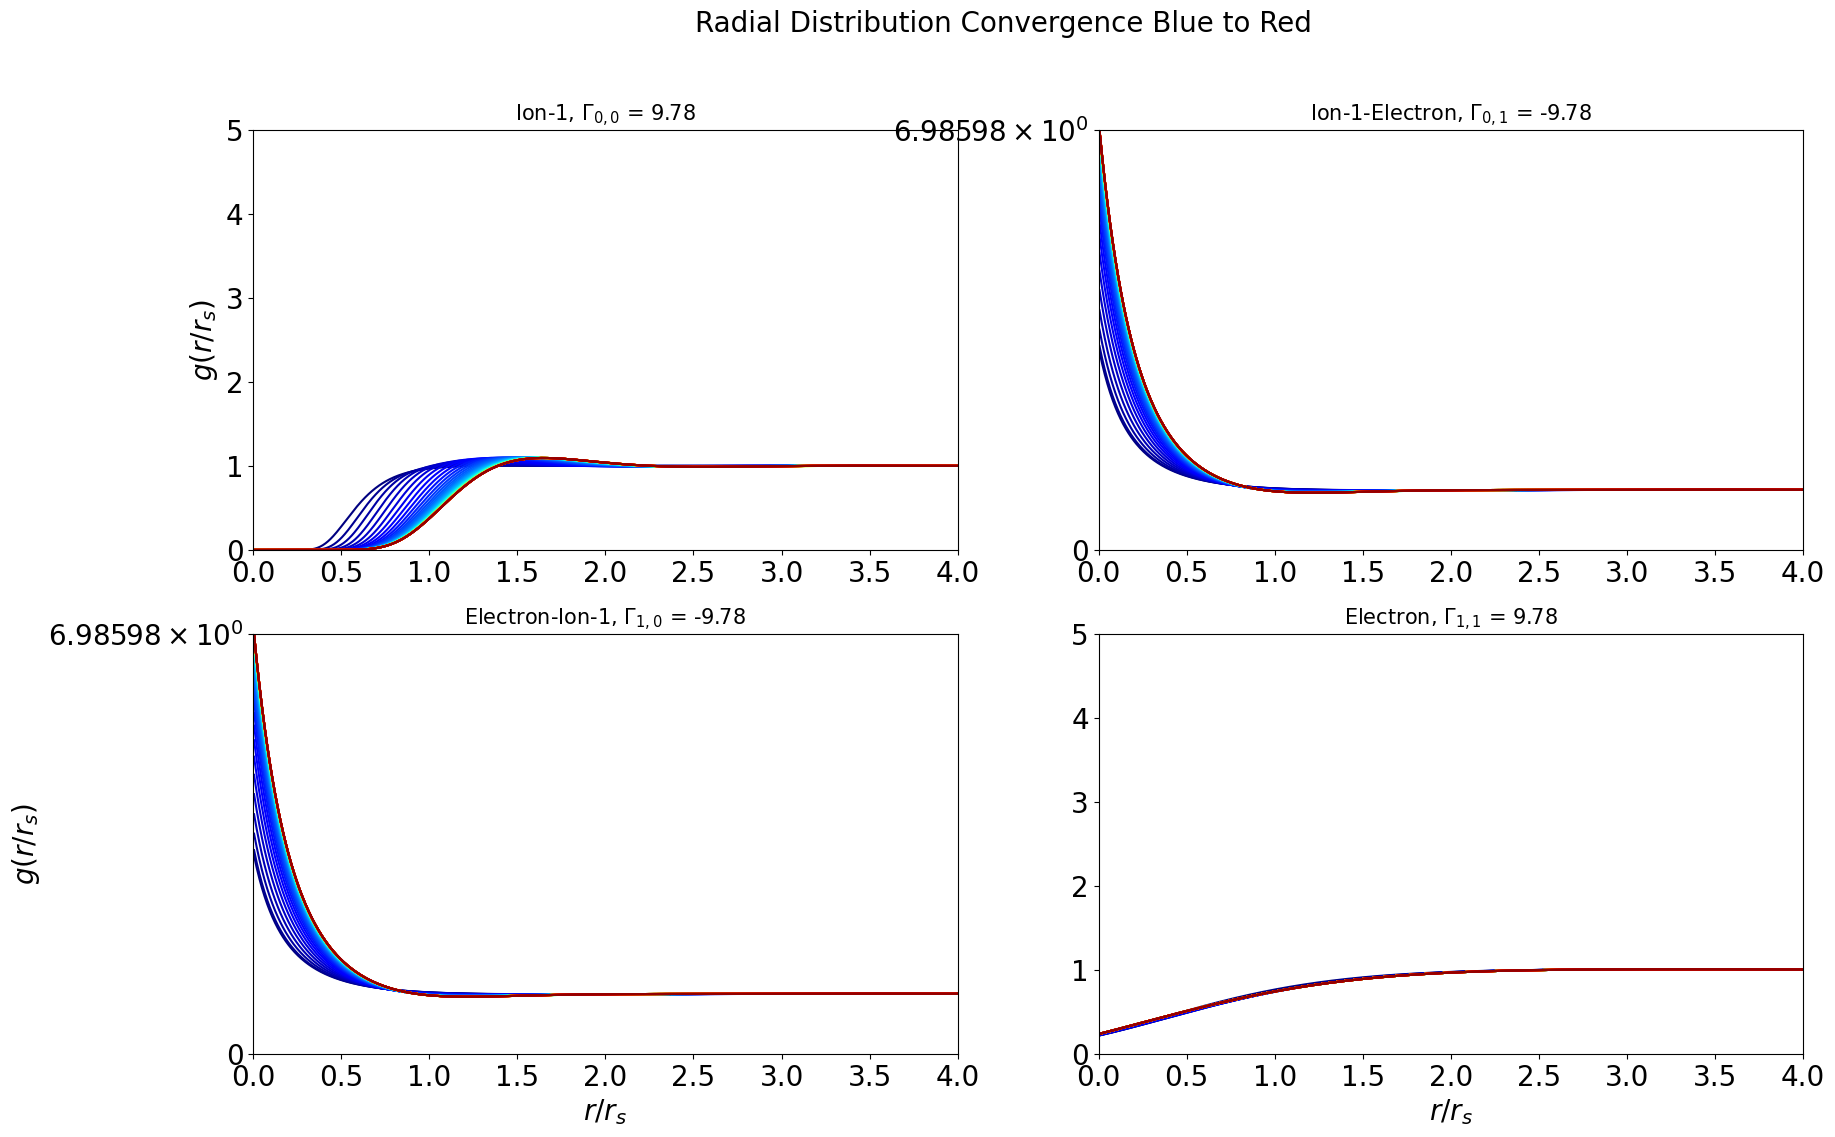

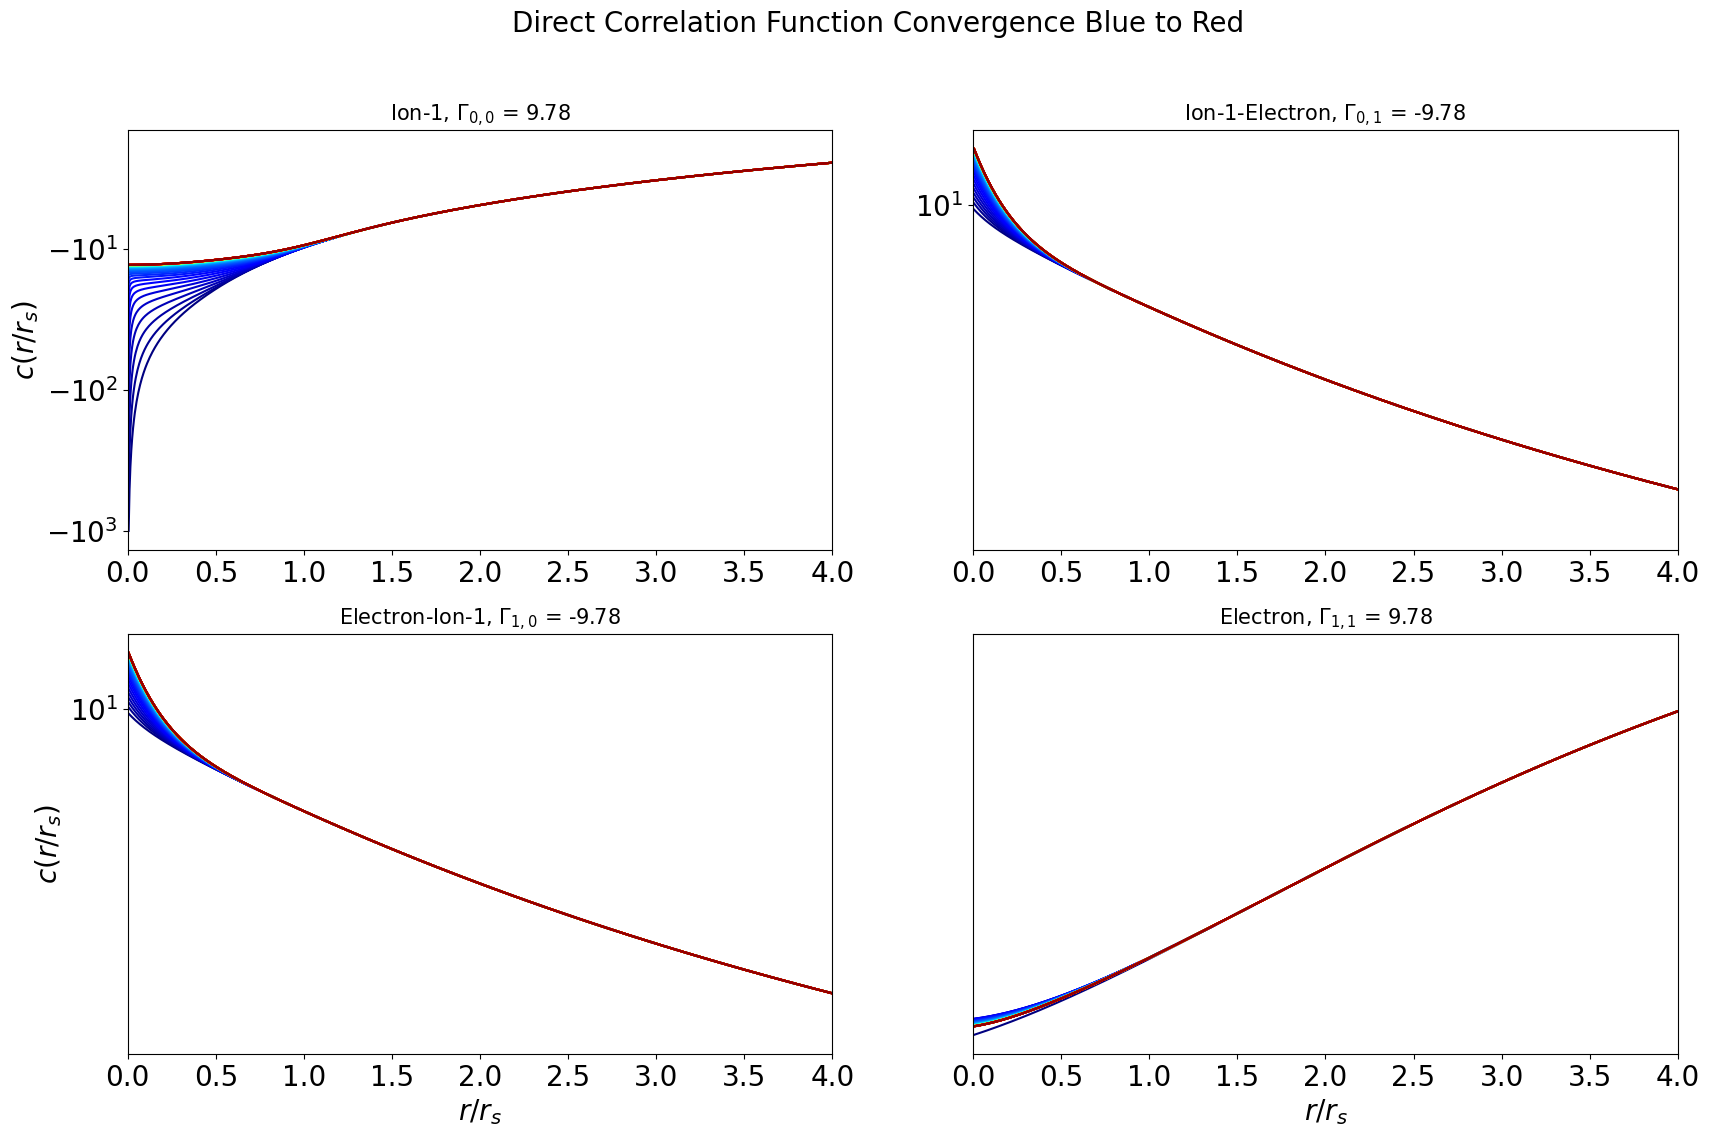

In [19]:
hydrogen.plot_species_convergence_g(n_slices= int(len(hydrogen.h_list)/1)  )
hydrogen.plot_species_convergence_c(n_slices= int(len(hydrogen.h_list)/1)  )

In [22]:
hydrogen_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 1.496
Λei = 1.058
Γii=9.778, Γie=-9.783, Γee=9.778 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00622788] True Optimization terminated successfully.
0: Err in c_r: 3.72e+01, OZ: 1.24e-01, HNC: 1.69e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00150465] True Optimization terminated successfully.
1: Err in c_r: 1.91e+01, OZ: 1.14e-01, HNC: 1.22e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 9.93e+00, OZ: 1.05e-01, HNC: 1.04e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00211755] True Optimization terminated successfully.
3: Err in c_r: 5.22e+00, OZ: 9.06e-02, HNC: 9.42e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00179066] True Optimization terminated successfully.
4: Err in c_r: 2.77e+00, OZ: 8.08e-02, HNC: 9.05e-03
 HNC min: [0.5] True Optimi

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 2.30e-04, OZ: 1.02e-04, HNC: 1.37e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 1.99e-04, OZ: 8.80e-05, HNC: 1.18e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 1.72e-04, OZ: 7.62e-05, HNC: 1.02e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 1.49e-04, OZ: 6.60e-05, HNC: 8.87e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 1.29e-04, OZ: 5.72e-05, HNC: 7.68e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
58: Err in c_r: 1.12e-04, OZ

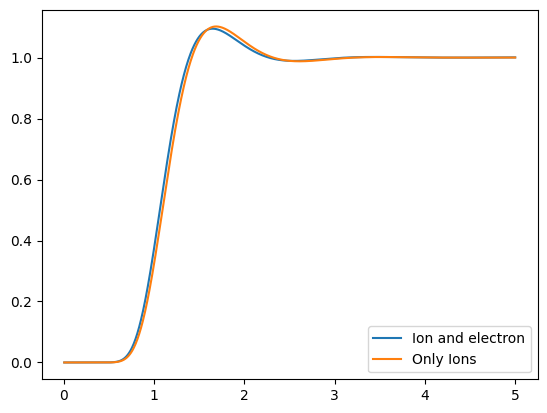

In [24]:
fig, ax = plt.subplots()

ax.plot(hydrogen.r_array, hydrogen.h_r_matrix[0,0]+1, label='Ion and electron')
ax.plot(hydrogen.r_array, hydrogen_one_species.h_r_matrix[0,0]+1, label="Only Ions")
ax.legend()



## Aluminum

In [7]:
ni = 6.03e22 # per cc
Te = 1*eV 
Ti   = 1*eV 
Z, A = 13,27
Zstar= 3
# aluminum = run_hnc(ni, Te, Z, A, Zstar, num_iterations=1e3, method='fixed',alpha=0.01)#, c_s_r_guess=c_s_r_guess )
aluminum_i_one_species = run_hnc_one_species(ni, Te, Z, A, Zstar, num_iterations=1e3 )
aluminum_e_one_species = run_hnc_one_species(Zstar*ni, Te, 1, m_e/m_p, 1, num_iterations=1e3 )


Λei = 0.222
Λee = 0.313
Λei = 0.222
Γii=81.917, Γie=-2.769, Γee=0.923 
r_i=2.989
r_e=2.073
θ  =8.57e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 2.83e+02, OZ: 2.85e-01, HNC: 1.26e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 1.55e+02, OZ: 2.67e-01, HNC: 6.65e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 8.50e+01, OZ: 2.54e-01, HNC: 5.24e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 4.75e+01, OZ: 2.46e-01, HNC: 1.67e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 2.73e+01, OZ: 2.41e-01, HNC: 5.77e-02
 HNC min: [0.5] True Optimization terminated s

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
49: Err in c_r: 2.86e-01, OZ: 9.65e-02, HNC: 7.83e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
50: Err in c_r: 2.75e-01, OZ: 9.42e-02, HNC: 7.48e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
51: Err in c_r: 2.65e-01, OZ: 9.19e-02, HNC: 7.14e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 2.55e-01, OZ: 8.96e-02, HNC: 6.83e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 2.45e-01, OZ: 8.74e-02, HNC: 6.54e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 2.36e-01, OZ

KeyboardInterrupt: 

In [ ]:
aluminum_i_one_species.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum_i_one_species.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

aluminum_e_one_species.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum_e_one_species.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

In [ ]:
c_s_r_guess = np.zeros((2,2,N_bins))
c_s_r_guess[0,0] = aluminum_i_one_species.c_s_r_matrix
c_s_r_guess[1,1] = aluminum_e_one_species.c_s_r_matrix

In [26]:
aluminum = run_hnc(ni, Te, Z, A, Zstar, num_iterations=2, c_s_r_guess=c_s_r_guess )

NameError: name 'c_s_r_guess' is not defined

In [ ]:
aluminum.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

In [ ]:
aluminum.c_list[-1][1,1]/aluminum.c_list[0][1,1]